In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("medical_examination.csv")

In [ ]:
## df['overweight'] = df['overweight'].apply(lambda x: 1 if x > 25 else 0)


In [3]:
df_over = df['weight']/((df['height']/100)**2)
bynario = df_over > 25

df['overweight'] = bynario.astype(int)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


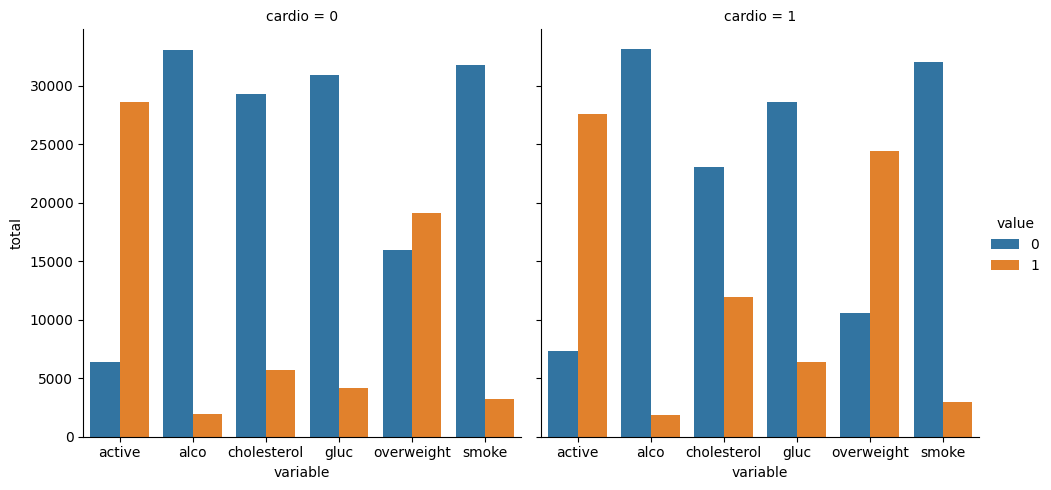

In [4]:
df.loc[df['cholesterol'] == 1 , 'cholesterol'] = 0 ## troca 1 ------> 0
df.loc[df['cholesterol'] >= 2 , 'cholesterol'] = 1 ## troca 1 ------> 0
df.loc[df['gluc'] == 1 , 'gluc'] = 0 ## troca 1 ------> 0
df.loc[df['gluc'] >= 2 , 'gluc'] = 1 ## troca 1 ------> 0

teste_sea = df[['cardio','cholesterol','gluc','smoke','alco','active','overweight']]
teste_see = pd.melt(teste_sea,id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
count = teste_see.groupby(['cardio', 'variable', 'value']).size().reset_index()
count_sea = count.rename(columns={0 : 'total'}) 
sns.catplot(data=count_sea, kind="bar", x="variable", y="total", hue="value", col="cardio")


<AxesSubplot:>

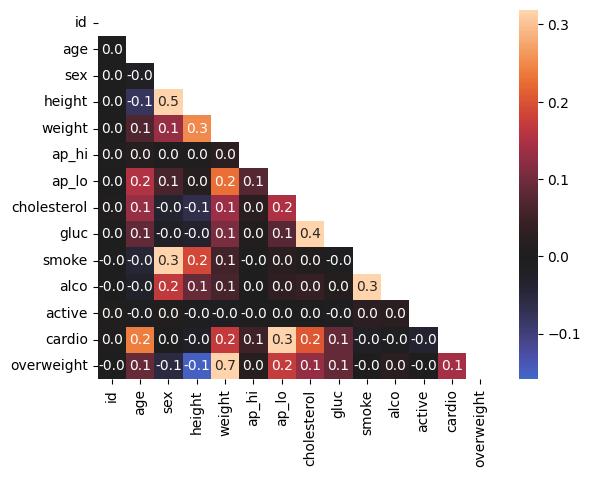

In [6]:
df_ap = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
mask = np.triu(np.ones_like(df_ap.corr()))
sns.heatmap(df_ap.corr(), center = 0.0 ,vmax = 0.319, vmin = -0.159 ,annot=True, mask=mask,fmt='.1f') # cmap="BuYlGnBu",

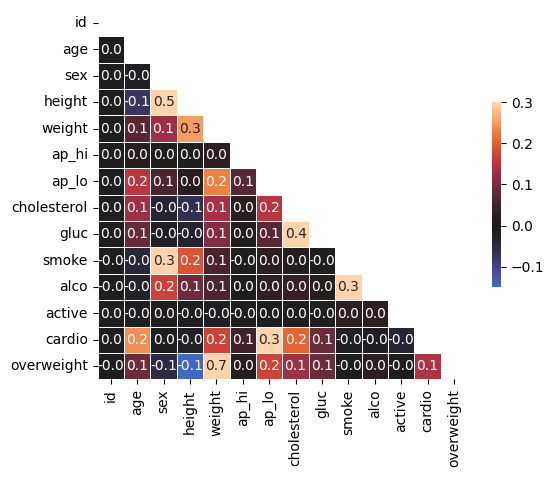

In [13]:
fig, ax = plt.subplots()
sns.heatmap(df_ap.corr(), mask=mask,  center = 0.0 ,annot=True, fmt=".1f", ax=ax,vmax = 0.319, vmin = -0.159 )
#sns.heatmap(df_ap.corr(), center = 0.0 ,annot=True, mask=mask,fmt='.1f') # cmap="BuYlGnBu",
#fig = sns.heatmap(data=corr, ax=ax, mask=mask, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={'shrink': 0.5}, fmt='.1f', annot=True).figure